<a href="https://colab.research.google.com/github/yeahjinjeong/mining/blob/main/DAA_jyj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import mglearn

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.font_manager as fm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option('display.max_columns', None)

In [58]:
estate = pd.read_csv("/content/drive/My Drive/Colab Notebooks/데분활/RealEstateAU.csv")
estate.head()

,index,TID,breadcrumb,category_name,property_type,building_size,land_size,preferred_size,open_date,listing_agency,price,location_number,location_type,address,address_1,city,state,zip_code,phone,latitude,longitude,product_depth,bedroom_count,bathroom_count,parking_count
0,0,1350988,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added 2 hours ago,Professionals - DARWIN CITY,435000.0,139468611,Buy,"44 Woods Street, Darwin City, NT 0800",44 Woods Street,Darwin City,NT,800,08 8941 8289,NaN,NaN,premiere,2.0,1.0,1.0
1,1,1350989,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,171.0,NaN,171.0,Added 7 hours ago,Nick Mousellis Real Estate - Eview Group Member,320000.0,139463755,Buy,"14/14 Dashwood Place, Darwin City, NT 0800",14/14 Dashwood Place,Darwin City,NT,800,411724000,NaN,NaN,premiere,3.0,2.0,2.0
2,2,1350990,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,NaN,NaN,Added 22 hours ago,Habitat Real Estate - THE GARDENS,310000.0,139462495,Buy,"13/86 Woods Street, Darwin City, NT 0800",13/86 Woods Street,Darwin City,NT,800,08 8981 0080,NaN,NaN,premiere,2.0,1.0,1.0
3,3,1350991,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added yesterday,Ray White - NIGHTCLIFF,259000.0,139451679,Buy,"1309/43B Knuckey Street, Darwin City, NT 0800",1309/43B Knuckey Street,Darwin City,NT,800,08 8982 2403,NaN,NaN,premiere,1.0,1.0,0.0
4,4,1350992,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,201.0,NaN,201.0,Added yesterday,Carol Need Real Estate - Fannie Bay,439000.0,139433803,Buy,"3/10 McLachlan Street, Darwin City, NT 0800",3/10 McLachlan Street,Darwin City,NT,800,418885966,NaN,NaN,premiere,3.0,2.0,2.0


In [59]:
estate.loc[estate['building_size'] != estate['building_size'], 'building_size'] = 0
estate.loc[estate['land_size'] != estate['land_size'], 'land_size'] = 0

In [60]:
estate.loc[estate['preferred_size'] != estate['preferred_size'], 'preferred_size'] = estate['building_size']+estate['land_size']

In [61]:
estate = estate.drop('building_size', axis=1)
estate = estate.drop('land_size', axis=1)
estate = estate.rename (columns = {'preferred_size': 'property_size'})

In [62]:
estate = estate.drop('index', axis=1)
estate = estate.drop('open_date', axis=1)
estate = estate.drop('location_type', axis=1)
estate = estate.drop('listing_agency', axis=1)
estate = estate.drop('address', axis=1)
estate = estate.drop('address_1', axis=1)
estate = estate.drop('state', axis=1)
estate = estate.drop('phone', axis=1)
estate = estate.drop('latitude', axis=1)
estate = estate.drop('longitude', axis=1)

In [63]:
estate = estate.dropna(subset=['price'],axis=0)
estate = estate.dropna(subset=['bedroom_count'],axis=0)
estate = estate.dropna(subset=['bathroom_count'],axis=0)
estate = estate.dropna(subset=['parking_count'],axis=0)

In [64]:
estate.head() 

,TID,breadcrumb,category_name,property_type,property_size,price,location_number,city,zip_code,product_depth,bedroom_count,bathroom_count,parking_count
0,1350988,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,0.0,435000.0,139468611,Darwin City,800,premiere,2.0,1.0,1.0
1,1350989,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,171.0,320000.0,139463755,Darwin City,800,premiere,3.0,2.0,2.0
2,1350990,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,0.0,310000.0,139462495,Darwin City,800,premiere,2.0,1.0,1.0
3,1350991,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,0.0,259000.0,139451679,Darwin City,800,premiere,1.0,1.0,0.0
4,1350992,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,201.0,439000.0,139433803,Darwin City,800,premiere,3.0,2.0,2.0


In [70]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TID              748 non-null    int64  
 1   breadcrumb       748 non-null    int64  
 2   category_name    748 non-null    int64  
 3   property_type    748 non-null    int64  
 4   property_size    748 non-null    float64
 5   price            748 non-null    float64
 6   location_number  748 non-null    int64  
 7   city             748 non-null    int64  
 8   zip_code         748 non-null    int64  
 9   product_depth    748 non-null    int64  
 10  bedroom_count    748 non-null    float64
 11  bathroom_count   748 non-null    float64
 12  parking_count    748 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 81.8 KB


In [66]:
estate['breadcrumb'].replace(['Buy>NT>DARWIN CITY','Buy>NT>DARWIN'], [0,1],inplace=True)
estate['category_name'].replace(['Real Estate & Property for sale in DARWIN CITY, NT 0800','Real Estate & Property for sale in DARWIN, NT 0801'], [0,1],inplace=True)
estate['property_type'].replace(['House','Apartment','Unit','Studio', 'Block Of Units', 'Townhouse', 'Acreage', 'Duplex/Semi-detached', 'Other', 'Villa'], [1,2,3,4,5,6,7,8,9,10],inplace=True)
estate['product_depth'].replace(['feature','standard','premiere', 'midtier'], [1,2,3,4],inplace=True)

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
encoding_columns=['city']
for ecolumn in encoding_columns:
  labels=[]
  encoder = LabelEncoder()
  items=list(estate[ecolumn])
  encoder.fit(items)
  labels=encoder.transform(items)
  estate[ecolumn]=labels

In [69]:
estate['property_size'] = pd.to_numeric(estate['property_size'])

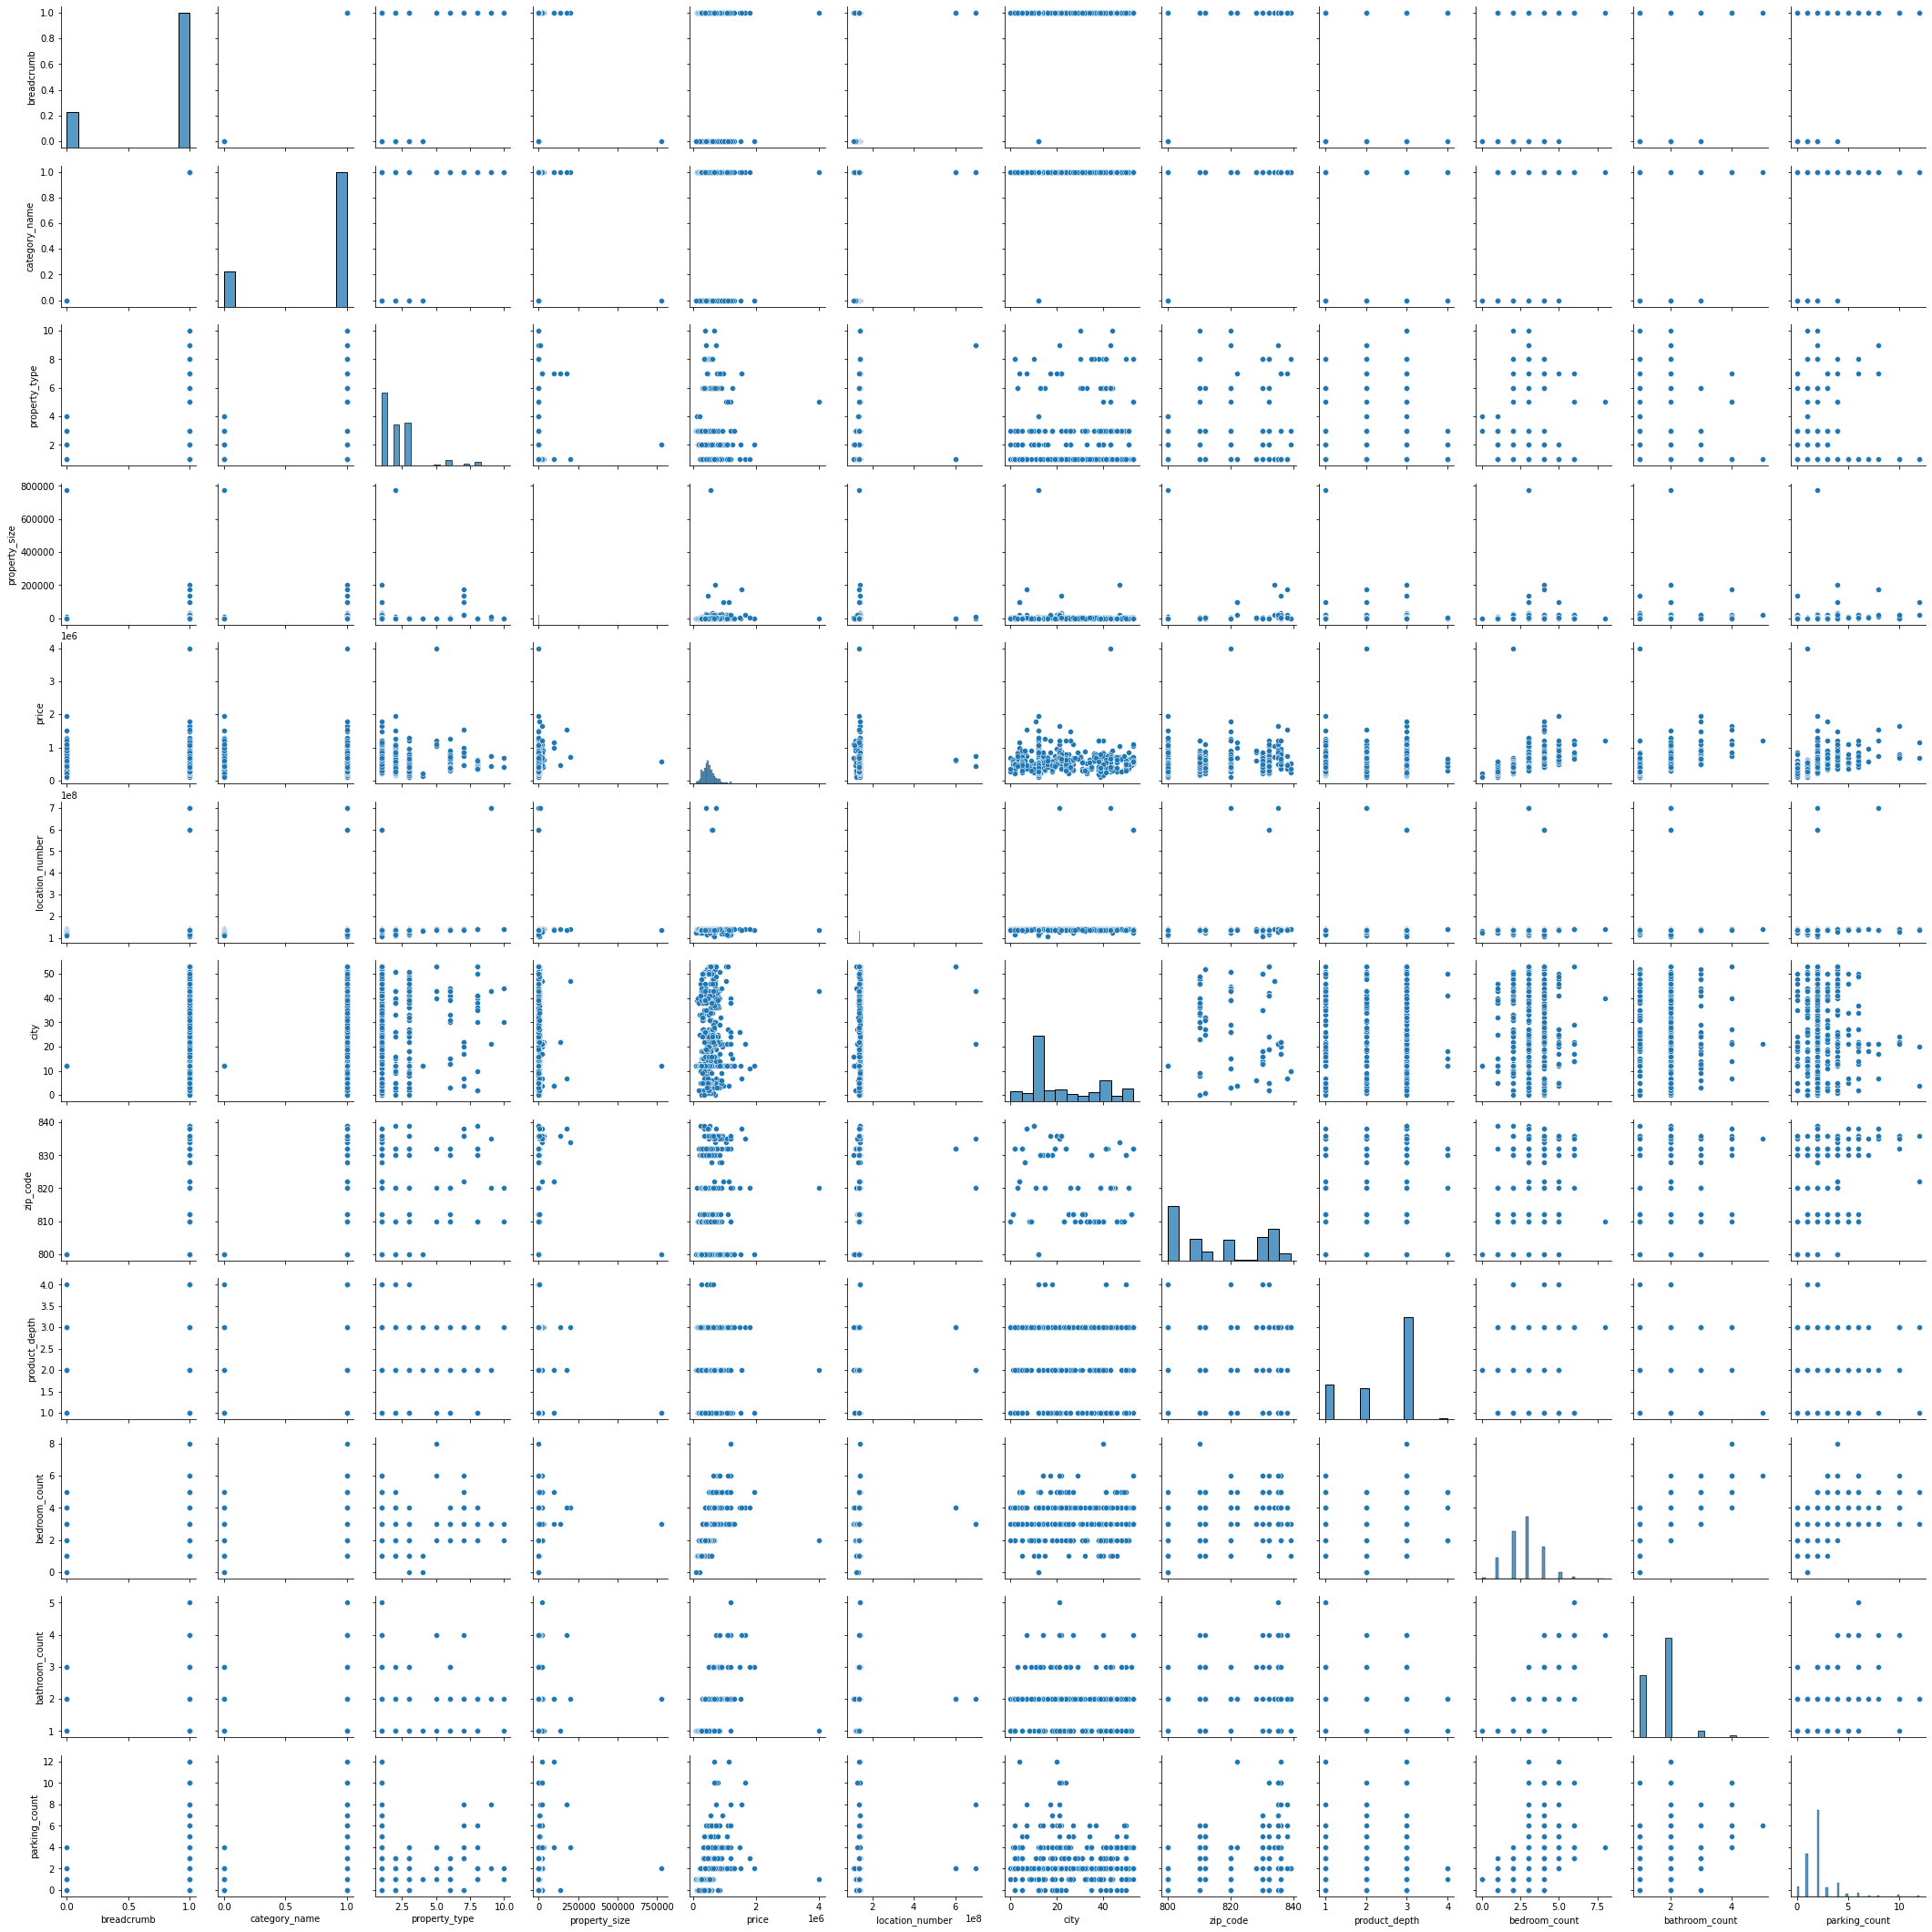

In [72]:
sns.pairplot(estate.drop('TID', axis=1))
plt.show()

zip count 가 높을수록 주차공간이 많아진다.

bedromm, bathroom, parking 의 비례관계.

In [74]:
X = estate

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled = MinMaxScaler().fit_transform(X)

In [76]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

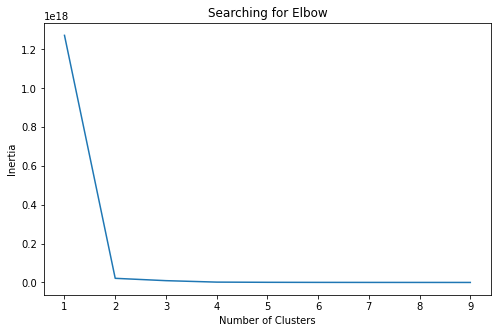

In [77]:
clusters =[]
for i in range(1, 10):
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
plt.show()

In [109]:
print(estate.median())

TID                  1351480.5
property_size            145.0
breadcrumb                 1.0
category_name              1.0
property_type              2.0
price                 490000.0
location_number    138997529.0
city                      14.5
zip_code                 812.0
product_depth              3.0
bedroom_count              3.0
bathroom_count             2.0
parking_count              2.0
size_criteria              1.0
price_criteria        490000.0
dtype: float64


In [139]:
estate['price_criteria'] = estate['price']

In [111]:
estate.head()

,TID,property_size,breadcrumb,category_name,property_type,price,location_number,city,zip_code,product_depth,bedroom_count,bathroom_count,parking_count,price_criteria
0,1350988,0.0,0,0,1,435000.0,139468611,12,800,3,2.0,1.0,1.0,435000.0
1,1350989,171.0,0,0,2,320000.0,139463755,12,800,3,3.0,2.0,2.0,320000.0
2,1350990,0.0,0,0,3,310000.0,139462495,12,800,3,2.0,1.0,1.0,310000.0
3,1350991,0.0,0,0,1,259000.0,139451679,12,800,3,1.0,1.0,0.0,259000.0
4,1350992,201.0,0,0,3,439000.0,139433803,12,800,3,3.0,2.0,2.0,439000.0


In [140]:
estate.loc[(estate['price_criteria'] <= 490000), 'price_criteria'] = False
estate.loc[(estate['price_criteria'] > 490000), 'price_criteria'] = True

In [141]:
estate['price_criteria'].unique()

array([False, True], dtype=object)

In [142]:
estate['price_criteria'] = estate['price_criteria'].map({False:False, True: True})

In [143]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TID              748 non-null    int64  
 1   property_size    748 non-null    float64
 2   breadcrumb       748 non-null    int64  
 3   category_name    748 non-null    int64  
 4   property_type    748 non-null    int64  
 5   price            748 non-null    float64
 6   location_number  748 non-null    int64  
 7   city             748 non-null    int64  
 8   zip_code         748 non-null    int64  
 9   product_depth    748 non-null    int64  
 10  bedroom_count    748 non-null    float64
 11  bathroom_count   748 non-null    float64
 12  parking_count    748 non-null    float64
 13  price_criteria   748 non-null    bool   
dtypes: bool(1), float64(5), int64(8)
memory usage: 98.7 KB


In [86]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pydotplus 
import os

In [88]:
estate.columns

Index(['TID', 'breadcrumb', 'category_name', 'property_type', 'property_size',
       'price', 'location_number', 'city', 'zip_code', 'product_depth',
       'bedroom_count', 'bathroom_count', 'parking_count', 'size_criteria'],
      dtype='object')

In [146]:
estate = estate[['TID', 'price', 'breadcrumb', 'category_name', 'property_type',
        'property_size', 'location_number', 'city', 'zip_code', 'product_depth',
       'bedroom_count', 'bathroom_count', 'parking_count', 'price_criteria']]

In [186]:
X = estate.iloc[:, 4:13] 
y = estate['price_criteria']

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
#x 독립변수 y 종속변수

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train))) #정확도 1은 overfitting
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.840


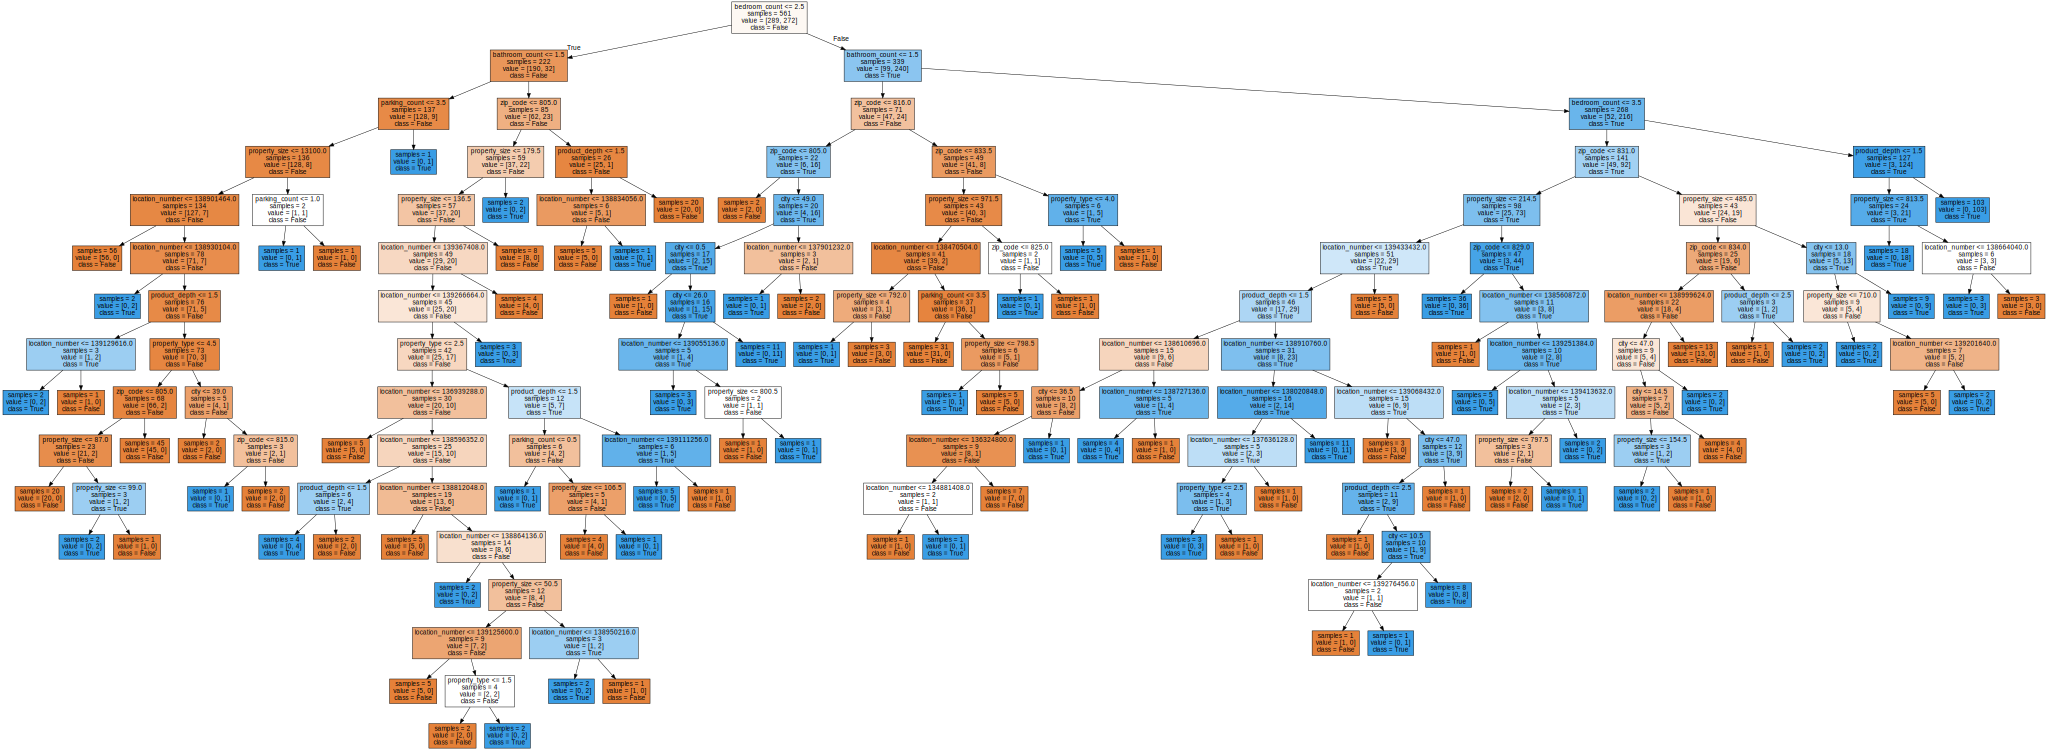

In [187]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "False", "True"],
                feature_names=estate.columns[4:13], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [190]:
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.939
시험용 데이터 정확도: 0.824


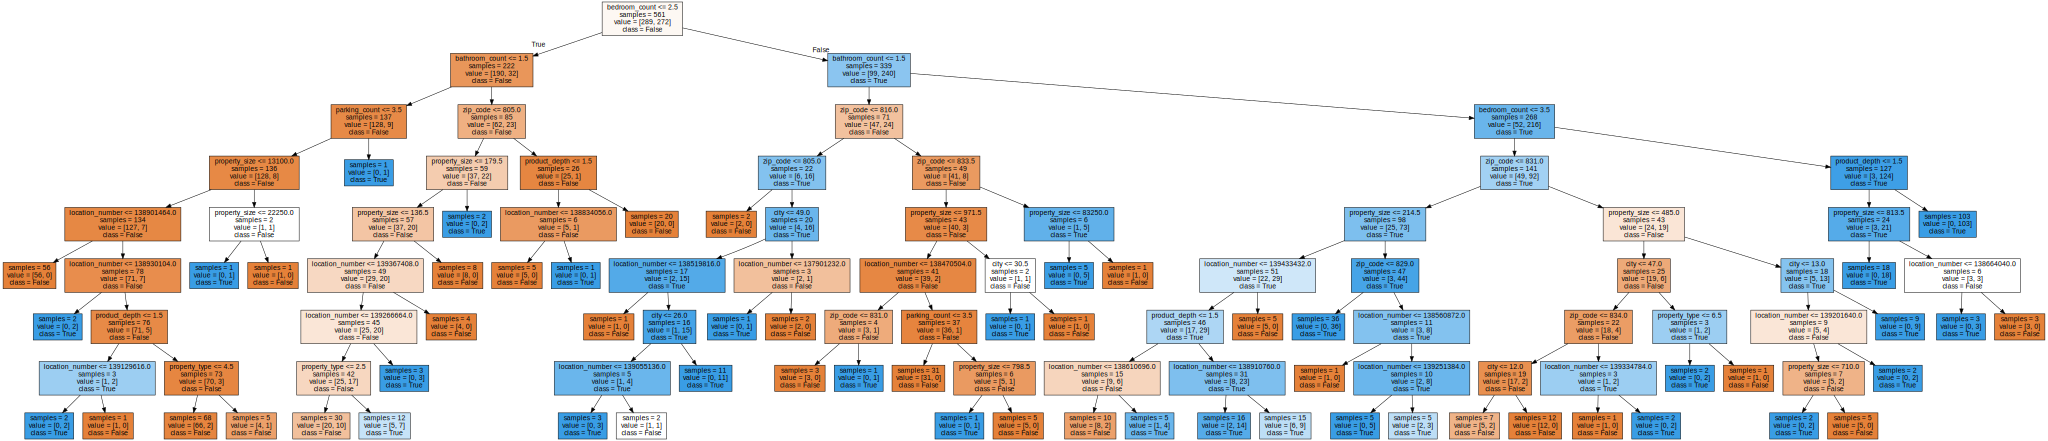

In [191]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "False", "True"],
                feature_names=estate.columns[4:13], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [188]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.02322691 0.12051524 0.17599285 0.04664432 0.1167218  0.04444926
 0.35437184 0.10343103 0.01464675]


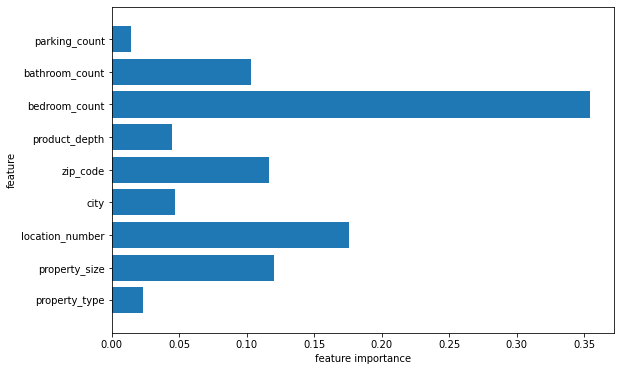

In [189]:
import numpy as np

def plot_feature_importances_gps(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(estate.columns[4:13]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), estate.columns[4:13])   
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_gps(tree)

In [192]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=70, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.866


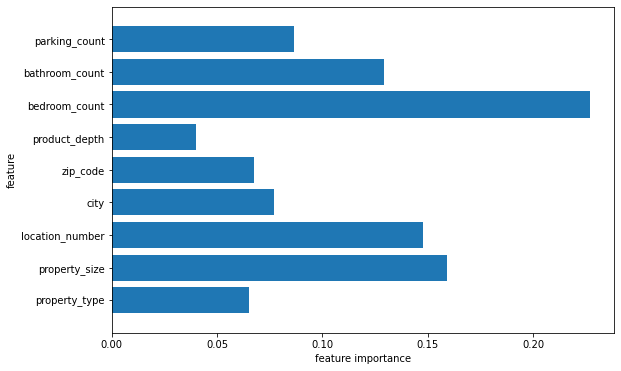

In [193]:
plot_feature_importances_gps(forest)

In [194]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 


print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.78947368 0.80357143 0.76785714 0.80357143 0.78571429 0.83928571
 0.83928571 0.82142857 0.80357143 0.83928571]
Random forest:  [0.87719298 0.85714286 0.82142857 0.82142857 0.89285714 0.91071429
 0.875      0.92857143 0.85714286 0.875     ]
Accuracy mean
Decision tree :0.809
Random forest :0.872


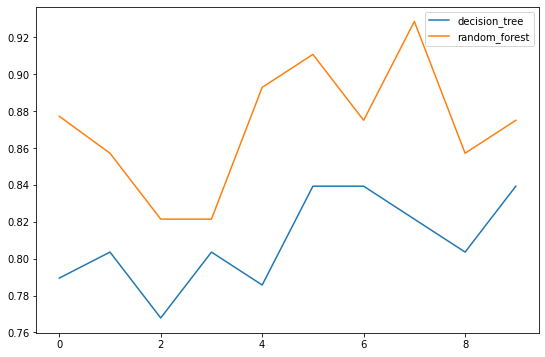

In [195]:
cv_list = [['decision_tree',dt_scores], ['random_forest',rf_scores]]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()